<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-модели" data-toc-modified-id="Исследование-модели-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Исследование модели</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Матрица-ошибок" data-toc-modified-id="Матрица-ошибок-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Матрица ошибок</a></span></li><li><span><a href="#Взвешивание-классов" data-toc-modified-id="Взвешивание-классов-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Взвешивание классов</a></span></li><li><span><a href="#Увеличение-выборки" data-toc-modified-id="Увеличение-выборки-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Увеличение выборки</a></span></li><li><span><a href="#Уменьшение-выборки" data-toc-modified-id="Уменьшение-выборки-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Уменьшение выборки</a></span></li><li><span><a href="#Графики-ROC-кривая" data-toc-modified-id="Графики-ROC-кривая-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Графики ROC-кривая</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [1]:
!pip install scikit-learn==1.1.3 -q
!pip install imblearn -q

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier, plot_tree 
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from tqdm import tqdm

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.utils import shuffle
from sklearn.metrics import recall_score

In [3]:
try:
    df = pd.read_csv('/datasets/Churn.csv', sep=',')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/Churn.csv', sep=',')

In [4]:
top_platforms = df['Geography'].unique()
top_platforms

array(['France', 'Spain', 'Germany'], dtype=object)

In [5]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [7]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,NaN,NaN,NaN,5000.5,2886.89568,1.0,2500.75,5000.5,7500.25,10000.0
CustomerId,10000.0,NaN,NaN,NaN,15690940.5694,71936.186123,15565701.0,15628528.25,15690738.0,15753233.75,15815690.0
Surname,10000,2932,Smith,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CreditScore,10000.0,NaN,NaN,NaN,650.5288,96.653299,350.0,584.0,652.0,718.0,850.0
Geography,10000,3,France,5014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,10000,2,Male,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,10000.0,NaN,NaN,NaN,38.9218,10.487806,18.0,32.0,37.0,44.0,92.0
Tenure,9091.0,NaN,NaN,NaN,4.99769,2.894723,0.0,2.0,5.0,7.0,10.0
Balance,10000.0,NaN,NaN,NaN,76485.889288,62397.405202,0.0,0.0,97198.54,127644.24,250898.09
NumOfProducts,10000.0,NaN,NaN,NaN,1.5302,0.581654,1.0,1.0,1.0,2.0,4.0


In [8]:
df.duplicated().sum()

0

<AxesSubplot:>

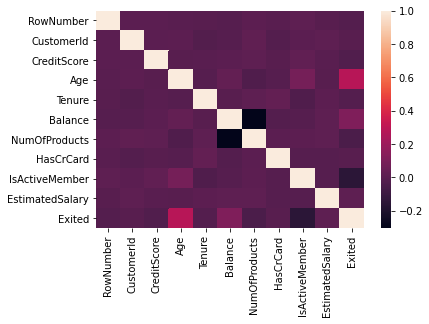

In [9]:
sns.heatmap(df.corr())

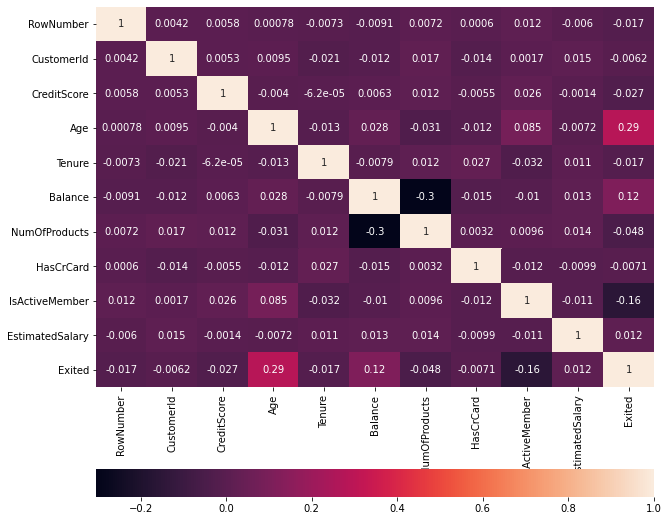

In [10]:
fig, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(df.corr(), annot = True, cbar_kws= {'orientation': 'horizontal'} );

In [11]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

Удалил часть ненужной информации,она не понадобится в проекте,возможно из-за нее будет искожение данных.

In [12]:
new_columns = []
for col in df.columns:
    new_columns.append(re.sub(r'(?<!^)(?=[A-Z])', '_', col).lower())
df.columns = new_columns

In [13]:
f"{df['tenure'].isna().sum() / df['tenure'].sum():.2%}"

'2.00%'

In [14]:
df = df.dropna(subset=['tenure'])


Удалил пропуски в столбце **tenure**,пропуски заполнить нечем, так как мы не можем определить сколько лет человек является клиентом банка и процент потери информации небольшой.

In [15]:
df['tenure'] = df['tenure'].astype('int')

In [16]:
print(f"Доля объектов положительного класса : {sum(df['exited']/len(df))}")
print(f"Доля объектов отрицательного класса : {1 - sum(df['exited']/len(df))}")

Доля объектов положительного класса : 0.2039379606204001
Доля объектов отрицательного класса : 0.7960620393795999


**Вывод:** Файл открыт и изучен,у нас в наличии 14 столбца и 10000 строк,строки с пропусками в столбце "Tenure" удалил и поменял на целочисленное,остальные столбцы имеют нужный формат,дубликатов в файле нет.Сильной корреляции между признаками не обнаружено. Так же замечен разный масштаб у признаков.  Привел название столбцов к единому стилю и посмотрел на долю положительных и отрицательных значений в целевом принзнаке,соотношение 1 к 4 соответственно.

## Исследование задачи

### Подготовка данных

Привел признаки в столбцах 'credit_score', 'balance', 'num_of_products', 'age', 'tenure', 'has_cr_card', 'is_active_member', 'estimated_salary' к одному масштабу.

In [17]:
features = df.drop(['exited'], axis=1)
target = df['exited']

In [18]:
features_train, features_test, target_train, target_test = train_test_split(features, target, 
                                                                            test_size=0.4, random_state=12345,
                                                                            stratify=target)
features_valid, features_test, target_valid, target_test = train_test_split(features_test, target_test, 
                                                                            test_size=0.5, random_state=12345, 
                                                                            stratify=target_test)

In [19]:
for i in [features_train, features_valid, target_train, target_valid, features_test, target_test]:
    print(i.shape)

(5454, 10)
(1818, 10)
(5454,)
(1818,)
(1819, 10)
(1819,)


Данные были разбиты на *признаки* и *целевые признаки*,далее с соотношением 3:1:1 разбили на *тренировочную*,*тестовую* и *валидационную* соответственно,при проверке все соотношения совпадают.

In [20]:
ohe_features = features_train.select_dtypes(include='object').columns.to_list()
ohe_features

['geography', 'gender']

In [21]:
X_train = features_train.copy()
X_valid = features_valid.copy()

In [22]:
encoder_ohe = OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False)

encoder_ohe.fit(X_train[ohe_features])

X_train[
    encoder_ohe.get_feature_names_out()
] = encoder_ohe.transform(X_train[ohe_features])

X_train = X_train.drop(ohe_features, axis=1)

In [23]:
num_features = features_train.select_dtypes(exclude='object').columns.to_list()

scaler = StandardScaler()
X_train[num_features] = scaler.fit_transform(X_train[num_features])

X_train.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
9723,-1.292898,-0.660843,0.686341,0.786636,-0.910943,-1.554765,-1.036226,-0.223548,0.0,0.0,1.0
1224,-1.563714,0.778434,1.034232,0.833795,-0.910943,0.643184,-1.036226,1.383021,0.0,1.0,0.0
8377,1.581914,0.106771,-0.357331,-1.222967,0.789359,0.643184,0.965040,-0.308331,0.0,1.0,1.0
8014,0.842379,0.010820,-1.053112,0.807063,-0.910943,0.643184,0.965040,-0.430980,0.0,1.0,0.0
2491,-0.397123,-1.236554,-0.357331,-1.222967,0.789359,0.643184,0.965040,1.392642,0.0,1.0,0.0


Кодируем категориальные признаки методом ОНЕ,обучаем тренировочную и трансформируем.

In [24]:
X_valid[
    encoder_ohe.get_feature_names_out()
] = encoder_ohe.transform(X_valid[ohe_features])

X_valid = X_valid.drop(ohe_features, axis=1)

X_valid[num_features] = scaler.transform(
    X_valid[num_features]
)

X_valid.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
7493,-0.417955,-0.181084,1.730013,1.023931,0.789359,0.643184,0.96504,0.519901,0.0,1.0,0.0
5460,0.113260,0.202723,-0.009440,0.738812,0.789359,-1.554765,0.96504,0.364920,1.0,0.0,1.0
9126,1.071531,1.162241,-0.357331,0.054632,0.789359,-1.554765,0.96504,-0.545522,0.0,1.0,1.0
9801,-0.845011,-0.852747,-0.705222,1.010554,-0.910943,0.643184,0.96504,-1.154323,0.0,1.0,0.0
9101,-0.553363,-0.085132,0.338450,0.629162,0.789359,0.643184,0.96504,-1.296336,0.0,1.0,1.0


Энкодером, который обучен на ТРЕНИРОВОЧНОЙ ВЫБОРКЕ, кодируем валидационную и масштабируем.

In [25]:
X_train.shape, X_valid.shape

((5454, 11), (1818, 11))

Получилось одинаковое количество признаков.

In [26]:
(X_train.columns != X_valid.columns).sum()

0

Получились одинаковые признаки в тренировочной и валидационной выборках.

**Вывод:** Подготовил данные,разделил на признаки,техникой OHE кодировали категориальные признаки.

### Исследование модели

In [27]:
best_depth_rf = 0
best_est_rf = 0
best_f1_rf = 0
best_roc_auc_score_rf = 0
for est in tqdm(range(1,30)):
    for depth in range(1,10):
        model_rf = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth) 
        model_rf.fit(X_train, target_train)
        predictions_valid_rf = model_rf.predict(X_valid)
        f1_rf = f1_score(target_valid, predictions_valid_rf)
        roc_auc_score_rf = roc_auc_score(target_valid, model_rf.predict_proba(X_valid)[:,1])
        if f1_rf > best_f1_rf:
            best_f1_rf = f1_rf
            best_depth_rf = depth
            best_est_rf = est
            best_roc_auc_score_rf = roc_auc_score_rf
            
print('Depth:', best_depth_rf)
print('Число деревьев:', best_est_rf)
print('F1:', best_f1_rf)
print('AUC-ROC:', best_roc_auc_score_rf)

100%|██████████| 29/29 [00:16<00:00,  1.76it/s]

Depth: 9
Число деревьев: 24
F1: 0.5986622073578596
AUC-ROC: 0.875684798178963


**Вывод:** Исследован алгоритм *случайный лес*(без дисбаланса), взята глубина от 1 до 10 и числом деревьев от 1 до 30.Наилучшая модель на валидационной выборке с глубиной 9 и числом деревьев равных 24, ресурсозатратность же равна 1.79it/s.

In [28]:
model_lr = LogisticRegression(random_state=12345, solver='liblinear', max_iter=1000).fit(X_valid, target_valid)
predictions_lr = model_lr.predict(X_valid) 
        
print('F1:', f1_score(target_valid, predictions_lr))
print('AUC-ROC:', roc_auc_score(target_valid, model_lr.predict_proba(X_valid)[:, 1]))

F1: 0.3615819209039548
AUC-ROC: 0.7880064153551263


**Вывод:** При проверки валидационной выборки алгоритма *логической регрессии* F1 = 0.36

In [29]:
best_depth_dt = 0
best_f1_dt = 0
best_roc_auc_score_dt = 0
for depth in tqdm(range(1, 15)):
    model_dt = DecisionTreeClassifier(random_state=12345, max_depth = depth).fit(X_train, target_train)
    predictions_valid_dt = model_dt.predict(X_valid)
    f1_dt = f1_score(target_valid, predictions_valid_dt)
    roc_auc_score_dt = roc_auc_score(target_valid, model_dt.predict_proba(X_valid)[:,1])
    if f1_dt > best_f1_dt:
        best_f1_dt = f1_dt
        best_depth_dt = depth
        best_roc_auc_score_dt = roc_auc_score_dt
            
print('Depth:', best_depth_dt)
print('F1:', best_f1_dt)
print('AUC-ROC:', best_roc_auc_score_dt)

100%|██████████| 14/14 [00:00<00:00, 46.68it/s]

Depth: 7
F1: 0.5815126050420169
AUC-ROC: 0.8245379882534177


**Вывод:** При проверки валидационной выборки алгоритма *дерево решений*, лучшая F1 = 0.58 при *глубине* = 7,ресурсозатратность  равна 40.49it/s.

**Общий вывод:** Исследованы три алгоритма без учета дисбаланса,лучшую агрегирующую метрику *полноты* и *точности*,*F1-мера*   показал *случайный лес* с глубиной 9 и количеством деревьев 24,лучшая метрика *AUC-ROC* так же у *случайного леса* и равна 0,87,что лучше чем у случайной модели,но не идеальна.

## Борьба с дисбалансом

### Матрица ошибок

In [30]:
confusion_matrix_dt= confusion_matrix(target_valid, predictions_valid_dt)

confusion_matrix_dt

array([[1291,  156],
       [ 199,  172]])

In [31]:
confusion_matrix_rf= confusion_matrix(target_valid, predictions_valid_rf)

confusion_matrix_rf

array([[1404,   43],
       [ 196,  175]])

Построил матрицу ошибок для *дерева решений* и *случайного леса*,наблюдаем большой дисбаланс. 

### Взвешивание классов

In [32]:
best_depth_dt = 0
best_f1_dt = 0
best_roc_auc_score_dt = 0
for depth in tqdm(range(1, 15)):
    model_dt = DecisionTreeClassifier(random_state=12345, max_depth = depth, class_weight = 'balanced')
    model_dt.fit(X_train, target_train)
    predictions_valid_dt = model_dt.predict(X_valid)
    f1_dt = f1_score(target_valid, predictions_valid_dt)
    roc_auc_score_dt = roc_auc_score(target_valid, model_dt.predict_proba(X_valid)[:,1])
    if f1_dt > best_f1_dt:
        best_f1_dt = f1_dt
        best_depth_dt = depth
        best_roc_auc_score_dt = roc_auc_score_dt
            
print('Depth:', best_depth_dt)
print('F1:', best_f1_dt)
print('AUC-ROC:', best_roc_auc_score_dt)


100%|██████████| 14/14 [00:00<00:00, 45.79it/s]

Depth: 6
F1: 0.583084577114428
AUC-ROC: 0.8353643657199484


**Вывод:** Исследован алгоритм *дерево решений*(с учетом баланса дисбаланса), взята глубина от 1 до 15.Наилучшая модель на валидационной выборке с глубиной 6, мера F1 осталась прежней.

In [33]:
best_depth_rf = 0
best_est_rf = 0
best_f1_rf = 0
best_roc_auc_score_rf = 0
for est in tqdm(range(1,30)):
    for depth in range(1,10):
        model_rf = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth, class_weight = 'balanced') 
        model_rf.fit(X_train, target_train)
        predictions_valid_rf = model_rf.predict(X_valid)
        f1_rf = f1_score(target_valid, predictions_valid_rf)
        roc_auc_score_rf = roc_auc_score(target_valid, model_rf.predict_proba(X_valid)[:,1])
        if f1_rf > best_f1_rf:
            best_f1_rf = f1_rf
            best_depth_rf = depth
            best_est_rf = est
            best_roc_auc_score_rf = roc_auc_score_rf
            
print('Depth:', best_depth_rf)
print('Число деревьев:', best_est_rf)
print('F1:', best_f1_rf)
print('AUC-ROC:', best_roc_auc_score_rf)

100%|██████████| 29/29 [00:16<00:00,  1.74it/s]

Depth: 9
Число деревьев: 15
F1: 0.640506329113924
AUC-ROC: 0.8662629438730938


**Вывод:** Исследован алгоритм *случайный лес*(с учетом баланса дисбаланса), взята глубина от 1 до 10 и количество деревьев от 1 до 30.Наилучшая модель на валидационной выборке с глубиной 9 и деревьев 15, мера F1 заметно улучшелась.

In [34]:
model = LogisticRegression(random_state=12345, solver='liblinear', max_iter=1000, class_weight='balanced')
model.fit(X_train, target_train)
predicted_valid = model.predict(X_valid)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.5065420560747663


**Вывод:** После балансирования классов,показатель F1 у *логической регрессии* заметно улучшился.

### Увеличение выборки

In [35]:
oversample = SMOTE(random_state=12345, k_neighbors=4)
features_upsampled, target_upsampled = oversample.fit_resample(X_train, target_train)

Использовал SMOTE для увеличения выборки.

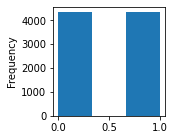

In [36]:
target_upsampled.plot(kind ='hist', bins=3, figsize=(2,2));

Наблюдаем баланс после увеличения выборки.

In [37]:
best_depth_rf = 0
best_est_rf = 0
best_f1_rf = 0
best_roc_auc_score_rf = 0
for est in tqdm(range(1,30)):
    for depth in range(1,10):
        model_rf = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth) 
        model_rf.fit(features_upsampled, target_upsampled)
        predictions_valid_rf = model_rf.predict(X_valid)
        f1_rf = f1_score(target_valid, predictions_valid_rf)
        roc_auc_score_rf = roc_auc_score(target_valid, model_rf.predict_proba(X_valid)[:,1])
        if f1_rf > best_f1_rf:
            best_f1_rf = f1_rf
            best_depth_rf = depth
            best_est_rf = est
            best_roc_auc_score_rf = roc_auc_score_rf
            
print('Depth:', best_depth_rf)
print('Число деревьев:', best_est_rf)
print('F1:', best_f1_rf)
print('AUC-ROC:', best_roc_auc_score_rf)

100%|██████████| 29/29 [00:24<00:00,  1.19it/s]

Depth: 7
Число деревьев: 5
F1: 0.6375442739079102
AUC-ROC: 0.8660245102330876


**Вывод:** После проверки *случайного леса* на увеличенной выборке,мера F1 заметно лучше,чем без учета дисбаланса.

In [38]:
model_lr = LogisticRegression(solver='liblinear', random_state=12345, max_iter=1000).fit(features_upsampled, target_upsampled)
predictions_valid_lr = model_lr.predict(X_valid)

print("F1:", f1_score(target_valid, predictions_valid_lr))

F1: 0.5098777046095955


**Вывод:** Мера F1 у *логической регрессии* улучшилась.

In [39]:
best_depth_dt = 0
best_f1_dt = 0
best_roc_auc_score_dt = 0
for depth in tqdm(range(1, 15)):
    model_dt = DecisionTreeClassifier(random_state=12345, max_depth = depth).fit(features_upsampled, target_upsampled)
    predictions_valid_dt = model_dt.predict(X_valid)
    f1_dt = f1_score(target_valid, predictions_valid_dt)
    roc_auc_score_dt = roc_auc_score(target_valid, model_dt.predict_proba(X_valid)[:,1])
    if f1_dt > best_f1_dt:
        best_f1_dt = f1_dt
        best_depth_dt = depth
        best_roc_auc_score_dt = roc_auc_score_dt
            
print('Depth:', best_depth_dt)
print('F1:', best_f1_dt)
print('AUC-ROC:', best_roc_auc_score_dt)

100%|██████████| 14/14 [00:00<00:00, 27.97it/s]

Depth: 12
F1: 0.5957972805933252
AUC-ROC: 0.7803700192050846


**Вывод:** Мера F1 у *дерева решений* улучшилась,глубина 12.

**Вывод:** Для увеличения выборки,был выбран SMOTE,метрика F1 заметно улучшилась у всех моделей после увеличения выборки.

### Уменьшение выборки

In [40]:
rus = RandomUnderSampler(random_state=12345)
features_downsampled, target_downsampled = rus.fit_resample(X_train, target_train)

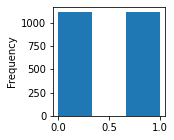

In [41]:
target_downsampled.plot(kind ='hist', bins=3, figsize=(2,2));

In [42]:
best_depth_rf = 0
best_est_rf = 0
best_f1_rf = 0
best_roc_auc_score_rf = 0
for est in tqdm(range(1,30)):
    for depth in range(1,10):
        model_rf = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth) 
        model_rf.fit(features_downsampled, target_downsampled)
        predictions_valid_rf = model_rf.predict(X_valid)
        f1_rf = f1_score(target_valid, predictions_valid_rf)
        roc_auc_score_rf = roc_auc_score(target_valid, model_rf.predict_proba(X_valid)[:,1])
        if f1_rf > best_f1_rf:
            best_f1_rf = f1_rf
            best_depth_rf = depth
            best_est_rf = est
            best_roc_auc_score_rf = roc_auc_score_rf
            
print('Depth:', best_depth_rf)
print('Число деревьев:', best_est_rf)
print('F1:', best_f1_rf)
print('AUC-ROC:', best_roc_auc_score_rf)

100%|██████████| 29/29 [00:11<00:00,  2.54it/s]

Depth: 6
Число деревьев: 25
F1: 0.6153846153846154
AUC-ROC: 0.8730331553153006


**Вывод:** Исследован алгоритм *случайный лес*, взята глубина от 1 до 10 и количество деревьев от 1 до 30.Наилучшая модель на валидационной выборке с глубиной 6 и деревьев 25, мера F1 стала хуже в сравнении  с увеличенной выборкой.

In [43]:
best_depth_dt = 0
best_f1_dt = 0
best_roc_auc_score_dt = 0
for depth in tqdm(range(1, 15)):
    model_dt = DecisionTreeClassifier(random_state=12345, max_depth = depth).fit(features_downsampled, target_downsampled)
    predictions_valid_dt = model_dt.predict(X_valid)
    f1_dt = f1_score(target_valid, predictions_valid_dt)
    roc_auc_score_dt = roc_auc_score(target_valid, model_dt.predict_proba(X_valid)[:,1])
    if f1_dt > best_f1_dt:
        best_f1_dt = f1_dt
        best_depth_dt = depth
        best_roc_auc_score_dt = roc_auc_score_dt
            
print('Depth:', best_depth_dt)
print('F1:', best_f1_dt)
print('AUC-ROC:', best_roc_auc_score_dt)

100%|██████████| 14/14 [00:00<00:00, 74.17it/s]

Depth: 4
F1: 0.5623721881390594
AUC-ROC: 0.827097424357859


**Вывод:** Исследован алгоритм *дерево решений*, взята глубина от 1 до 15.Наилучшая модель на валидационной выборке с глубиной 4, мера F1 стала хуже в сравнении  с увеличенной выборкой.

In [44]:
model_lr = LogisticRegression(solver='liblinear', random_state=12345, max_iter=1000)
model_lr.fit(features_downsampled, target_downsampled)
predictions_valid_lr = model_lr.predict(X_valid)

print("F1:", f1_score(target_valid, predictions_valid_lr))

F1: 0.5134883720930233


**Вывод:** Исследован алгоритм *логическая регрессия*,  мера F1 самая лучшая после уменьшения выборки.

**Вывод:** Для уменьшения выборке выбрал RandomUnderSampler.Показатели метрик хуже чем у *увеличиной выборки*.

### Графики ROC-кривая

0.7911004643867692


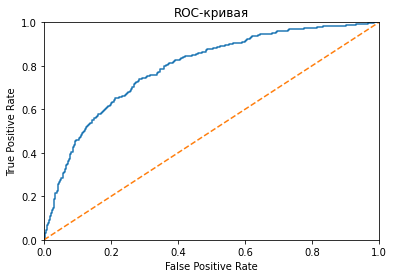

In [45]:
probabilities_valid_lr = model_lr.predict_proba(X_valid)
probabilities_one_valid = probabilities_valid_lr[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) # < напишите код здесь >

print(roc_auc_score(target_valid, probabilities_one_valid))

plt.figure()

plt.plot(fpr, tpr)# < постройте график >

# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show() 

0.7115455901884556


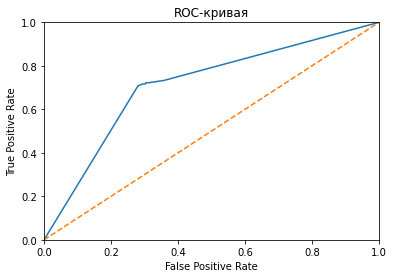

In [46]:
probabilities_valid_dt = model_dt.predict_proba(X_valid)
probabilities_one_valid = probabilities_valid_dt[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

print(roc_auc_score(target_valid, probabilities_one_valid))

plt.figure()

plt.plot(fpr, tpr)

plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show() 

0.874159195435486


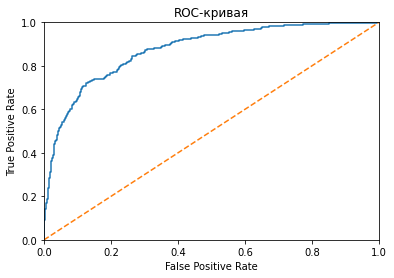

In [47]:
probabilities_valid_rf = model_rf.predict_proba(X_valid)
probabilities_one_valid = probabilities_valid_rf[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

print(roc_auc_score(target_valid, probabilities_one_valid))


plt.figure()

plt.plot(fpr, tpr)

plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show() 

**Вывод:** Ожидаемо площадь больше(между случайной моделью и кривой) и соответственно метрика выше у *случайного леса*.

**Вывод:** Лучшей моделью оказался *случайный лес*,после взвешивания классов с гиперпараметрами Depth: 9 и числом деревьев: 15, метрика F1 = 0.64.

## Тестирование модели

Проведем тестирование лучшей модели *случайный лес* (такая модель показала лучшую метрику).

In [48]:
features_train_valid = pd.concat([features_train] + [features_valid])
target_train_valid = pd.concat([target_train] + [target_valid]) 

Обьеденил *обучающую* и *валидационную* выборку для улучшения качества обучения и увеличил выборку.

In [49]:
ohe_features = features_train_valid.select_dtypes(include='object').columns.to_list()
ohe_features

['geography', 'gender']

In [ ]:
X_train_valid = features_train_valid.copy()
X_test = features_test.copy()

In [ ]:
encoder_ohe = OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False)

encoder_ohe.fit(X_train_valid[ohe_features])

X_train_valid[
    encoder_ohe.get_feature_names_out()
] = encoder_ohe.transform(X_train_valid[ohe_features])

X_train_valid = X_train_valid.drop(ohe_features, axis=1)

In [ ]:
num_features = features_train_valid.select_dtypes(exclude='object').columns.to_list()

scaler = StandardScaler()
X_train_valid[num_features] = scaler.fit_transform(X_train_valid[num_features])

X_train_valid.head()

In [ ]:
X_test[
    encoder_ohe.get_feature_names_out()
] = encoder_ohe.transform(X_test[ohe_features])

X_test = X_test.drop(ohe_features, axis=1)

X_test[num_features] = scaler.transform(
    X_test[num_features]
)

X_test.head()

Энкодером, который обучен на объедененой выборке, кодируем тестовую и масштабируем.

In [ ]:
X_train_valid.shape, X_test.shape

Получилось одинаковое количество признаков.

In [ ]:
(X_train_valid.columns != X_test.columns).sum()

In [ ]:
model_final_rf = RandomForestClassifier(random_state=12345, n_estimators=15, max_depth=9, class_weight = 'balanced')
model_final_rf.fit(X_train_valid, target_train_valid)
predictions_test_rf = model_final_rf.predict(X_test)
print("F1:", f1_score(target_test, predictions_test_rf))
print('Accuracy:' ,accuracy_score(target_test, predictions_test_rf))
print('AUC-ROC:', roc_auc_score(target_test, model_final_rf.predict_proba(X_test)[:,1]))


**Вывод:** После проверки модели на *тестовой* выборке,метрика F1 = 0.5939, что соответствует минимальному порогу задания в 0.59, AUC-ROC = 0.83

## Вывод

- Предоставленные данные изучены, DataFrame имеет 14 столбцов и 10000 строк,строки с пропусками в столбце "Tenure" удалил и поменял на целочисленное,остальные столбцы имеют нужный формат,дубликатов в файле нет.Сильной корреляции между признаками не обнаружено. Так же замечен разный масштаб у признаков.  Привел название столбцов к единому стилю и посмотрел на долю положительных и отрицательных значений в целевом принзнаке.
- Привел признаки в столбцах 'credit_score', 'balance', 'num_of_products', 'age', 'tenure', 'has_cr_card', 'is_active_member', 'estimated_salary' к одному масштабу.
- Преобразовал категориальные признаки в столбцах 'gender', 'geography' в численные,техникой прямого кодирования.
- Данные были разбиты на *признаки* и *целевые признаки*,далее с соотношением 3:1:1 разбили на *тренировочную*,*тестовую* и *валидационную* соответственно.
- Были исследованы алгоритмы Decision Tree Classifier,Logistic Regression и RandomForestClassifier, наилучший показатель F1 у RandomForestClassifier с гиперпараметрами *n_estimators* равным - 15 и *max_depth* равным 9 и *F1* равен значению 0.64.
- Провел взвешивание классов,а так же увеличил и уменьшил выборку и выбрал наилучшую модель для проверки на тестовой выборке.
- После проверки модели на тестовой выборке,метрика F1 = 0.594, что соответствует минимальному порогу задания в 0.59, AUC-ROC = 0.83.Вероятность ухода клиента из банка,меньше чем вероятность того что останется.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*